##1. Load and Understand the Dataset
1.1. Loaded the data

In [1]:
import pandas as pd
data = pd.read_csv('data_spectacles_customer_dataset.csv')


# 2. Explored the data:
 View the first few rows:

In [2]:
print(data.head())


   Unique ID Country  Age  Annual Family Income ($)  Gender  \
0    7319483     CAN   13                     20423    Male   
1    4791965     CAN   13                      5570  Female   
2    2991718     CAN   13                     58706  Female   
3    4220106     CAN   13                     57118    Male   
4    2263008     CAN   14                     59834    Male   

   Time spent watching videos/TV  Time spent playing indoor sports  \
0                              3                                 4   
1                              3                                 3   
2                              2                                 2   
3                              6                                 2   
4                              6                                 3   

   Time spent playing outdoor sports  \
0                                  3   
1                                  1   
2                                  1   
3                                  4   


Check the data types and null values

In [3]:
print(data.info())
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 29 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Unique ID                                                3220 non-null   int64 
 1   Country                                                  3220 non-null   object
 2   Age                                                      3220 non-null   int64 
 3   Annual Family Income ($)                                 3220 non-null   int64 
 4   Gender                                                   3220 non-null   object
 5   Time spent watching videos/TV                            3220 non-null   int64 
 6   Time spent playing indoor sports                         3220 non-null   int64 
 7   Time spent playing outdoor sports                        3220 non-null   int64 
 8   Total Time spent working in front of s

# 3. Data Cleaning
3.1. Handled missing values:

 Identified columns with missing data.

 Used imputation or remove rows with excessive missing values.

3.2. Handle incorrect data types:

Ensured numeric columns are not stored as strings

In [4]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')


3.3. Standardize text fields:
Cleaned inconsistencies in categorical data

# 4. Exploratory Data Analysis (EDA)
4.1. Univariate analysis:
Analyzed each column separately:

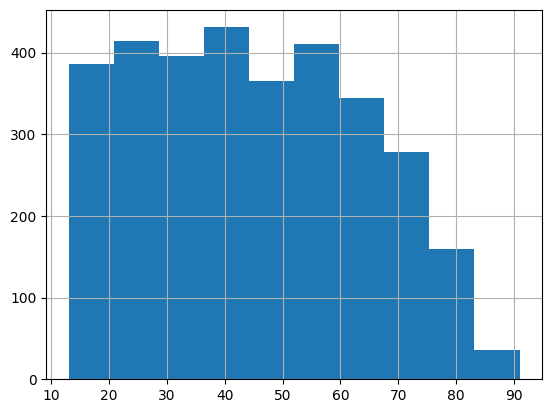

In [5]:
import matplotlib.pyplot as plt
data['Age'].hist()
plt.show()


4.2. Bivariate analysis:
Study relationships between variables, especially with the target variable (Wear Specs):

<Axes: xlabel='Wear Specs', ylabel='Age'>

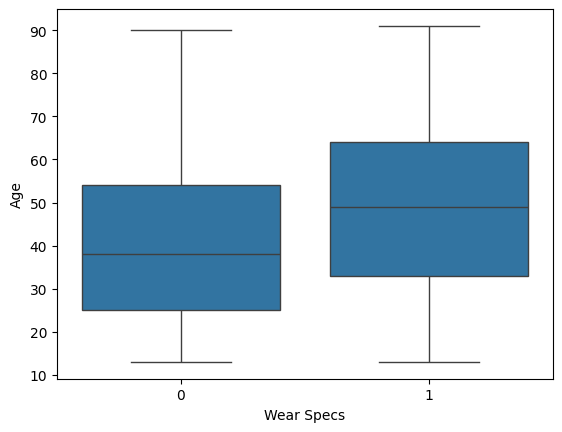

In [6]:
import seaborn as sns
sns.boxplot(x='Wear Specs', y='Age', data=data)


4.3. Correlation analysis:
Understanding the relationships between numeric variables:

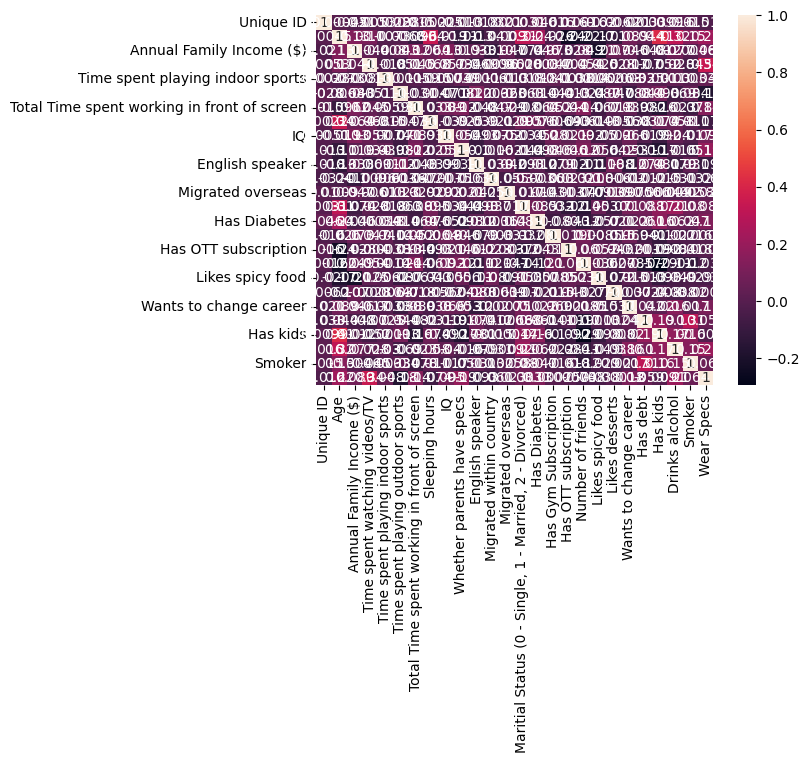

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix only for numeric columns
correlation = data.select_dtypes(include=['number']).corr()

# Generate the heatmap using the correlation matrix of numeric features
sns.heatmap(correlation, annot=True)
plt.show()


#5. Feature Engineering
Create new features:
Combine or transform existing data to add more predictive power (e.g., total time spent on screen = Time spent watching videos/TV + Total Time spent working in front of a screen).
Handle categorical variables:
Convert them into numeric format using one-hot encoding or label encoding

In [18]:
import pandas as pd

import pandas as pd

# Verify the actual column names in the DataFrame
print(data.columns)

# Fix the column name to the actual name in the DataFrame
marital_status_col = 'Maritial Status (0 - Single, 1 - Married, 2 - Divorced)'

# Use the found column name for creating dummy variables
data = pd.get_dummies(data, columns=['Gender', marital_status_col])


Index(['Unique ID', 'Country', 'Age', 'Annual Family Income ($)', 'Gender',
       'Time spent watching videos/TV', 'Time spent playing indoor sports',
       'Time spent playing outdoor sports',
       'Total Time spent working in front of screen', 'Sleeping hours', 'IQ',
       'Whether parents have specs', 'English speaker',
       'Migrated within country', 'Migrated overseas',
       'Maritial Status (0 - Single, 1 - Married, 2 - Divorced)',
       'Has Diabetes', 'Education Status', 'Has Gym Subscription',
       'Has OTT subscription', 'Number of friends', 'Likes spicy food',
       'Likes desserts', 'Wants to change career', 'Has debt', 'Has kids',
       'Drinks alcohol', 'Smoker', 'Wear Specs'],
      dtype='object')


# 6. Data Splitting
Divide the data into training and testing sets:

In [19]:
from sklearn.model_selection import train_test_split
X = data.drop('Wear Specs', axis=1)
y = data['Wear Specs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 7. Build a Machine Learning Model
7.1. Select a model:
Start with Logistic Regression or Decision Trees:

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


7.2. Train the model:

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Iterate over each column in X_train
for column in X_train.columns:
    # Check if the column contains object (string) data
    if X_train[column].dtype == 'object':
        # Fit the encoder to the unique values in the column
        encoder.fit(X_train[column])
        # Transform the column in both training and testing sets
        X_train[column] = encoder.transform(X_train[column])
        X_test[column] = encoder


7.3. Evaluate the model:

Use accuracy, precision, recall, and F1 score

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Iterate over each column in X_train
for column in X_train.columns:
    # Check if the column contains object (string) data
    if X_train[column].dtype == 'object':
        # Fit the encoder to the unique values in the column
        encoder.fit(X_train[column])
        # Transform the column in both training and testing sets
        X_train[column] = encoder.transform(X_train[column])
        # Use encoder.transform instead of assigning the encoder object
        X_test[column] = encoder.transform(X_test[column]) # This line was changed


#8. Fine-Tune and Improve
Try more advanced models like Random Forest or Gradient Boosting.
Use hyperparameter tuning:

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10]}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10]})

# 9. Insights and Visualization
Create clear visualizations to showcase findings:
Bar charts, pie charts, and heatmaps.
Summarize insights about potential customers and key factors influencing the need for glasses.


# 10. Deployment (Optional)
Save the model for future use

In [26]:
import joblib
joblib.dump(model, 'model.pkl')


['model.pkl']